In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
#show different between "true" value and "predicted" value
from sklearn.metrics import confusion_matrix

### Logistic Regression with multiple variables

In [2]:
digits = load_digits()
dir(digits)


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
len(digits['images'])
#digits['images'][0] #8 x 8 matrix
#digits['images'][0].shape
digits['images'][1796] #8 x 8 matrix

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

4

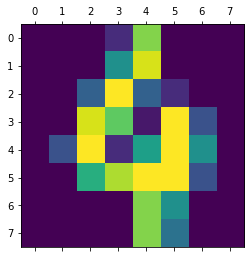

In [4]:
plt.matshow(digits['images'][100])
digits['target'][100]
#classification

In [5]:
digits['data'][15], digits['target'][15]

(array([ 0.,  5., 12., 13., 16., 16.,  2.,  0.,  0., 11., 16., 15.,  8.,
         4.,  0.,  0.,  0.,  8., 14., 11.,  1.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 14.,  0.,  0.,  0.,  0.,  1.,  6.,  6., 16.,  0.,  0.,
         0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.,  0.,  1.,  5., 15.,
        13.,  0.,  0.,  0.,  0.,  4., 15., 16.,  2.,  0.,  0.,  0.]),
 5)

In [6]:
X = digits['data']
y = digits['target']
X, y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
len(X_train) / len(X)

0.7996661101836394

In [9]:
model = LogisticRegression(max_iter=10000)
#train the model with "training set"
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [10]:
model.score(X_test, y_test)

0.9722222222222222

In [11]:
#len(X_test)/ len(X)
X_test[2], y_test[2]

(array([ 0.,  0.,  9., 13., 14., 15., 13.,  0.,  0.,  0., 16., 13., 12.,
        12.,  5.,  0.,  0.,  4., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  8.,
        16., 16., 11.,  1.,  0.,  0.,  0.,  1.,  7.,  8., 16., 12.,  0.,
         0.,  0.,  0.,  0.,  0.,  9., 13.,  0.,  0.,  0.,  0., 12.,  8.,
        12., 10.,  0.,  0.,  0.,  0., 10., 16., 13.,  3.,  0.,  0.]),
 5)

In [12]:
model.predict([X_test[2]])
#predict probability
model.predict_proba([X_test[2]])
#6.52115925e-03+9.87066911e-01+7.25289720e-08+9.81591067e-11+3.97795680e-07+2.72477398e-07+4.50805061e-09+1.56529935e-06+6.67829299e-06+6.40293916e-03

array([[2.34951438e-14, 2.20958407e-16, 7.49728370e-18, 1.61387361e-08,
        1.75007780e-19, 9.99999984e-01, 2.57031883e-14, 7.76306234e-15,
        8.69053627e-13, 4.86762096e-12]])

In [13]:
confusion_matrix(y_test, model.predict(X_test))

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 42,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 31]], dtype=int64)

Text(137.77777777777777, 0.5, 'True values')

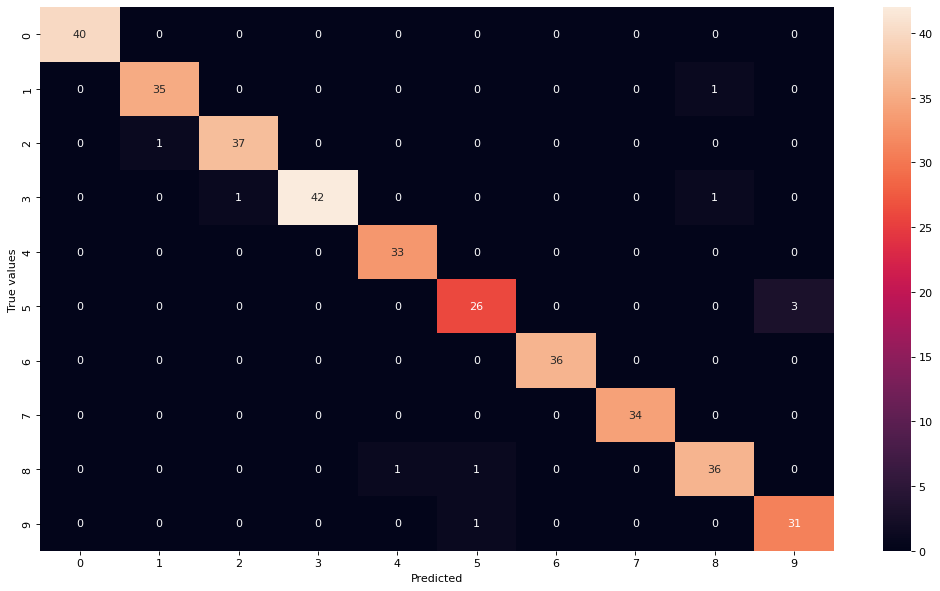

In [14]:
import seaborn
plt.figure(figsize = (16,9), dpi=80)
seaborn.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True)
plt.xlabel("Predicted")
plt.ylabel("True values")